start

In [ ]:
# https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets/code?select=churn-bigml-80.csv

In [3]:
import pandas as pd
import numpy as np
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [2]:
#Dummy dataset study case
X, Y = make_classification(n_samples=10000, n_features=4, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# x and y contain 10000 rows. x contain 4 columns
# weights = [0.99], so one class has 99% mejarity
Y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
Y.max()

In [ ]:
## No Imbalance Handling
# Define model
model_ori=RandomForestClassifier(criterion='entropy')
# Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores_ori = cross_validate(model_ori, X, Y, scoring=scoring, cv=cv_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores_ori['test_recall_macro']))

In [ ]:
## With SMOTE-Tomek Links method
# Define model
model=RandomForestClassifier(criterion='entropy')
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# Define pipeline
pipeline=Pipeline(steps=[('r', resample), ('m', model)])
# Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X, Y, scoring=scoring, cv=cv, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

In [ ]:
# Learn pipelines

Dataset

In [4]:
# real datasets

data = pd.read_csv('churn-bigml-80.csv')

data['Voice mail plan'].replace(to_replace='Yes', value=1, inplace=True)
data['Voice mail plan'].replace(to_replace='No',  value=0, inplace=True)
data['International plan'].replace(to_replace='No',  value=0, inplace=True)
data['International plan'].replace(to_replace='Yes',  value=1, inplace=True)
data['Churn'].replace(to_replace=False, value=0, inplace=True)
data['Churn'].replace(to_replace=True, value=1, inplace=True)
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
data.shape

In [ ]:
data['Churn'].value_counts()

In [ ]:
data=data.drop('State',axis=1)
data['Churn'].replace(to_replace=True, value=1, inplace=True)
data['Churn'].replace(to_replace=False,  value=0, inplace=True)
df_dummies=pd.get_dummies(data)
df_dummies.head()
#Churn dataset study case
Y_churn=df_dummies['Churn'].values
X_churn=df_dummies.drop('Churn',axis=1)

In [ ]:
## No Imbalance Handling
# Define model
model2_ori=RandomForestClassifier(criterion='entropy')
# Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv2_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores2_ori = cross_validate(model2_ori, X_churn, Y_churn, scoring=scoring, cv=cv2_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores2_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores2_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores2_ori['test_recall_macro']))

In [ ]:
## With SMOTE-Tomek Links method
# Define model
model2=RandomForestClassifier(criterion='entropy')
# Define SMOTE-Tomek Links
resample2=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
# Define pipeline
pipeline2=Pipeline(steps=[('r', resample2), ('m', model2)])
# Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv2=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores2 = cross_validate(pipeline2, X_churn, Y_churn, scoring=scoring, cv=cv2, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores2['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores2['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores2['test_recall_macro']))

In [ ]:
data_0 = data[data['Churn']==0]
data_1 = data[data['Churn']==1]
print(data_0.shape, data_1.shape)

In [ ]:
data_0 = data_0.sample(data_1.shape[0])
print(data_0.shape, data_1.shape)


In [ ]:
data_new = pd.concat([data_0,data_1], axis = 0)
x = data_new.drop(['Churn'], axis=1)
y = data_new['Churn']

In [ ]:
model3_ori=RandomForestClassifier(criterion='entropy')
# Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv3_ori=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores2_ori = cross_validate(model3_ori, x, y, scoring=scoring, cv=cv3_ori, n_jobs=-1)
# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores2_ori['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores2_ori['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores2_ori['test_recall_macro']))

In [ ]:
x.head(2)

In [ ]:

x['Voice mail plan'].replace(to_replace='Yes', value=1, inplace=True)
x['Voice mail plan'].replace(to_replace='No',  value=0, inplace=True)
x['International plan'].replace(to_replace='Yes', value=1, inplace=True)
x['International plan'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
x.head(4)

In [ ]:
#standardscalar
from sklearn.preprocessing import StandardScaler
# x_train_new = x.drop(columns=['Loan/No Loan'])
# y_train_new = train_new['Loan/No Loan']
x_train_sc = StandardScaler().fit_transform(x)
# x_test_sc = StandardScaler().fit_transform()


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=500, max_features=10)

model.fit(x_train_sc, y)

from sklearn.metrics import accuracy_score
y_train_pred = model.predict(x_train_sc)
accuracy_score(y, y_train_pred)

In [3]:
# kaggle solution 
# https://www.kaggle.com/code/khsamaha/telecom-churn-dataset-xgboost-algorithm

In [6]:
data.shape

(2666, 20)

In [12]:

data['Voice mail plan'].replace(to_replace='Yes', value=1, inplace=True)
data['Voice mail plan'].replace(to_replace='No',  value=0, inplace=True)
data['International plan'].replace(to_replace='No',  value=0, inplace=True)
data['International plan'].replace(to_replace='Yes',  value=1, inplace=True)
data['Churn'].replace(to_replace=False, value=0, inplace=True)
data['Churn'].replace(to_replace=True, value=1, inplace=True)

In [13]:
data.sample(10).T

,1577,561,2121,945,1950,2361,2040,1371,2332,1417
State,AZ,GA,MT,FL,NJ,DC,CO,HI,CT,TN
Account length,59,57,63,75,59,136,81,97,107,130
Area code,408,408,415,510,510,510,408,415,408,408
International plan,0,1,0,0,0,0,0,0,0,0
Voice mail plan,0,1,1,1,0,0,0,1,0,0
Number vmail messages,0,30,33,26,0,0,0,43,0,0
Total day minutes,150.2,234.5,184.2,118.5,195.0,204.5,115.3,121.1,90.7,127.0
Total day calls,70,130,111,86,58,63,99,105,90,102
Total day charge,25.53,39.87,31.31,20.15,33.15,34.77,19.6,20.59,15.42,21.59
Total eve minutes,185.7,195.2,312.6,213.9,198.5,208.8,224.7,260.2,207.5,206.9


In [14]:
data.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,0.101275,0.274944,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641,0.145536
std,39.563974,42.521018,0.301750,0.446570,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236,0.352707
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,0.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,0.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [17]:
data.corr()['Churn'].sort_values()

Voice mail plan          -0.099291
Number vmail messages    -0.086474
Total intl calls         -0.069882
Total eve calls          -0.001539
Area code                 0.001019
Total night calls         0.012262
Account length            0.017728
Total day calls           0.018290
Total night charge        0.033635
Total night minutes       0.033639
Total eve charge          0.072893
Total eve minutes         0.072906
Total intl minutes        0.086204
Total intl charge         0.086216
Total day minutes         0.195688
Total day charge          0.195689
Customer service calls    0.202590
International plan        0.277489
Churn                     1.000000
Name: Churn, dtype: float64

In [18]:
import seaborn as sns
sns.pairplot(data, hue = 'Churn')

In [ ]:
!pip install mglearn

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

iris_dataframe=pd.DataFrame(X_train,columns=iris_dataset.feature_names)
grr=pd.scatter_matrix(iris_dataframe,
                  c=y_train,figsize=(15,15),marker='o',hist_kwds={'bins':20},
                  s=60,alpha=.8,cmap=mglearn.cm3)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from pandas.plotting import scatter_matrix

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()

X_train,X_test,Y_train,Y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)
iris_dataframe = pd.DataFrame(X_train,columns=iris_dataset.feature_names)

grr = scatter_matrix(iris_dataframe,c = Y_train,figsize = (15,15),marker = 'o',
                        hist_kwds={'bins':20},s=60,alpha=.8,cmap = mglearn.cm3)
plt.show()

In [ ]:
#https://www.kaggle.com/code/waqasakhan/churn-prediction-f1score-93

In [2]:
!pip install plotly


     ---------------------------------------- 15.2/15.2 MB 7.7 MB/s eta 0:00:00


In [5]:
!pip install shap

     -------------------------------------- 432.7/432.7 kB 3.4 MB/s eta 0:00:00


In [6]:
# Core and plotting libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Stats libraries
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# ML libraries
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.decomposition import PCA

# Metrics
from sklearn.metrics import f1_score, classification_report, make_scorer

# Pre-processing and Model Selection
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Imblearn to handle imbalanced datasets
from imblearn.pipeline import make_pipeline, Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn import FunctionSampler

# To extract feature names
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_extraction.text import _VectorizerMixin

# To create our custom function in Pipeline
from sklearn.base import TransformerMixin

# Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Activation
from keras.wrappers.scikit_learn import KerasClassifier

# Pipeline saving
import joblib

# Model Evaluation
import shap

#----------------------------------------------------------------
# Define Custom Plotting Template For Matplotlib
#----------------------------------------------------------------
large=20; med=16; small=14

# print(plt.style.available)
plt.style.use('ggplot')

params = {'font.family'      : 'monospace',
          'axes.titlesize'   : large,
          'axes.titleweight' : 'bold',
          'axes.labelsize'   : large,
          'axes.labelweight' : 'bold',
          'xtick.labelsize'  : small,
          'ytick.labelsize'  : small,
          'legend.fontsize'  : small,
          'figure.figsize'   : (8,8),
          'grid.alpha': 0.5}

plt.rcParams.update(params)

In [7]:
train_df = pd.read_csv('churn-bigml-80.csv')
test_df=pd.read_csv('churn-bigml-20.csv')

In [8]:
print('\t Telecom Churn Dataset has {} rows and {} columns ..'.format(train_df.shape[0],train_df.shape[1]))

	 Telecom Churn Dataset has 2666 rows and 20 columns ..


In [9]:
train_df.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [11]:
def conv_data_type (ldf):
    #Convert columns with Yes/No to 1/0
    ldf['International plan'] = ldf['International plan'].map({'Yes':1, 'No':0})
    ldf['Voice mail plan'] = ldf['Voice mail plan'].map({'Yes':1, 'No':0})
    ldf['Churn'] = ldf['Churn'].astype(int)
conv_data_type(train_df)
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [12]:
train_df.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,0.101275,0.274944,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641,0.145536
std,39.563974,42.521018,0.301750,0.446570,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236,0.352707
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,0.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,0.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000,0.000000
75%,127.000000,510.000000,0.000000,1.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,1.000000,1.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


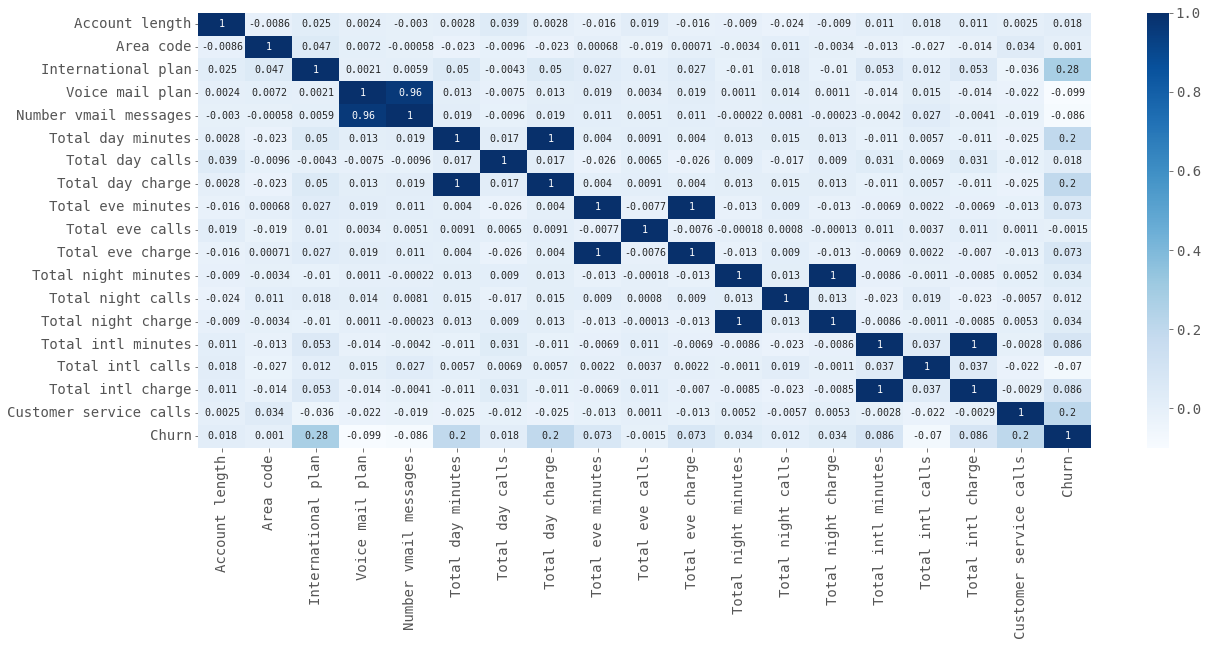

In [13]:
plt.figure(figsize = (20, 8))
sns.heatmap(train_df.corr(), cmap ='Blues', annot=True)
plt.show()

In [14]:
var_with_1_val = []

for col in train_df.columns:
    if len(train_df[col].unique()) == 1:
        var_with_1_val.append(col)
        
if len(var_with_1_val) > 0:
    print(f'The following Columns have only one Unique Value ..\n')
    
    for col in var_with_1_val:
        print(col)

In [15]:
#blank rows
train_df[train_df.isnull().all(axis = 1)]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn


In [16]:
# visualization
## Get the continous variables into the python list num_var
num_var = list(train_df.select_dtypes(exclude = ['object', 'bool']).columns)
unwanted_var = ['Churn', 'International plan', 'Voice mail plan', 'Area Code']
num_var = [var for var in num_var if var not in unwanted_var]
num_var

['Account length',
 'Area code',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',
 'Total day charge',
 'Total eve minutes',
 'Total eve calls',
 'Total eve charge',
 'Total night minutes',
 'Total night calls',
 'Total night charge',
 'Total intl minutes',
 'Total intl calls',
 'Total intl charge',
 'Customer service calls']

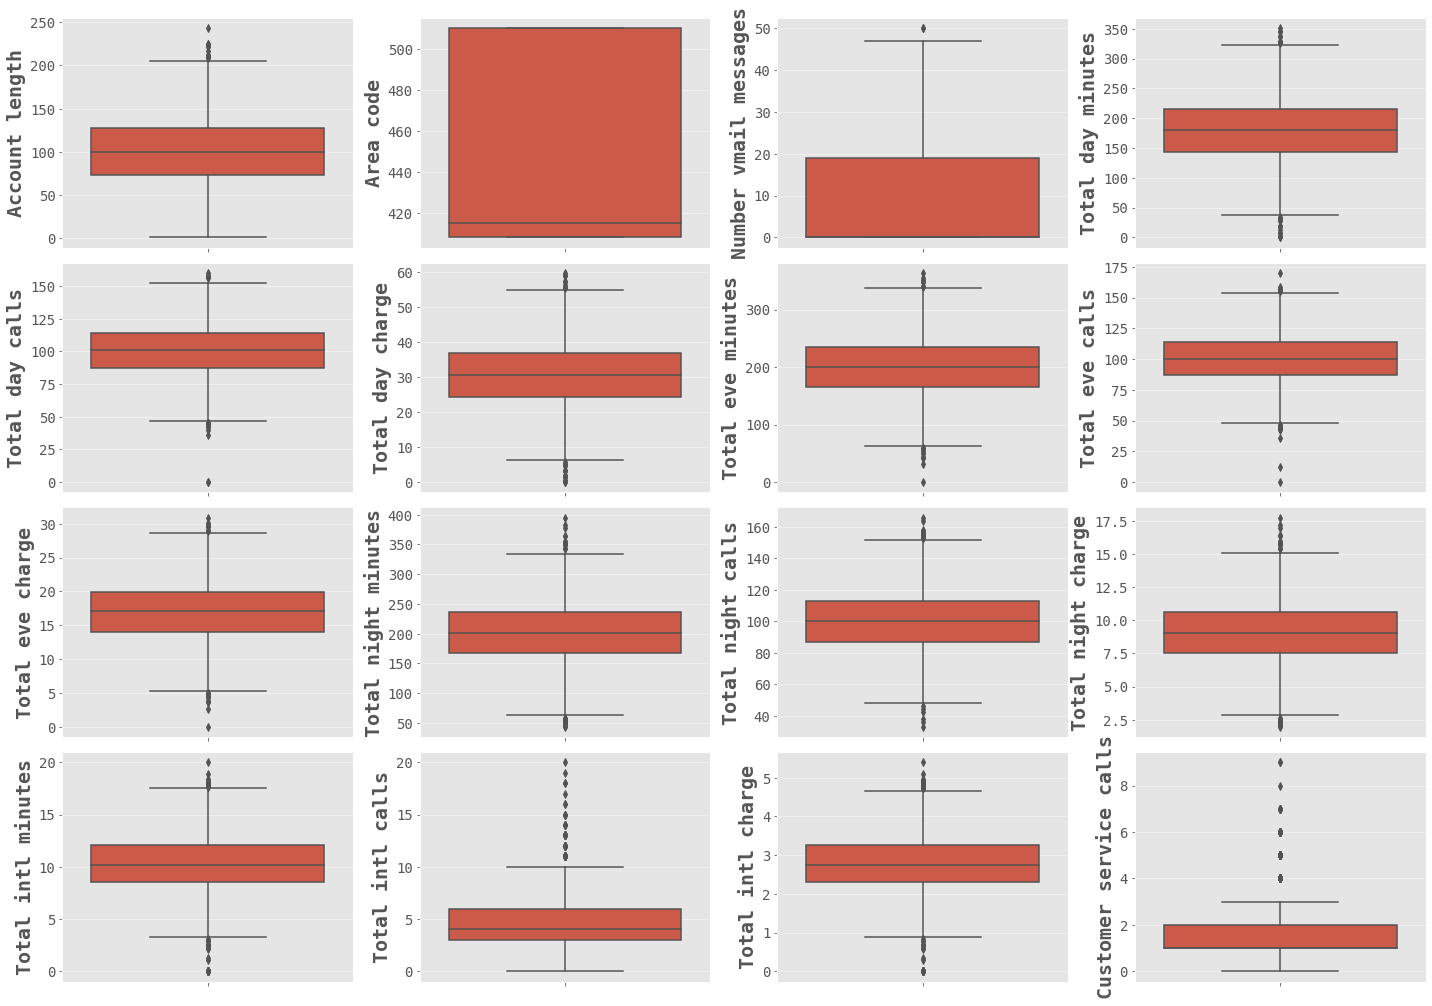

In [17]:
## Loop through each Continuous varible and plot the Boxplot
plt.figure(figsize = (20,170))
l_row = 50
l_pos = 1
for col in num_var:
    plt.subplot(l_row, 4, l_pos)
    sns.boxplot(y = col, data = train_df)
    l_pos = l_pos + 1
plt.tight_layout()
plt.show()

In [18]:
# Cap the outliers
# Let's cap the outliers to avoide any impact on the prediction of the models

for col in num_var:
    Q1 = train_df[col].quantile(0.05)
    Q3 = train_df[col].quantile(0.95)
    train_df[col][train_df[col] <= Q1] = Q1
    train_df[col][train_df[col] >= Q3] = Q3


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [19]:
# Reverify the Continuos Variables
train_df[num_var].describe(percentiles =[.25, .50, .75, .95, .99])

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.481620,437.438860,7.816954,179.709152,100.357464,30.551317,200.539047,100.041635,17.045985,201.115979,100.006377,9.050580,10.264704,4.366092,2.772149,1.517254
std,36.261773,42.521018,13.133957,49.397232,18.180586,8.397506,46.424562,18.261560,3.945840,46.163559,17.669287,2.077268,2.469337,2.129106,0.666397,1.183328
min,36.000000,408.000000,0.000000,90.425000,67.000000,15.375000,118.725000,67.000000,10.092500,117.925000,68.000000,5.310000,5.800000,1.000000,1.570000,0.000000
25%,73.000000,408.000000,0.000000,143.400000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.950000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.900000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
95%,166.000000,510.000000,36.000000,269.756250,133.000000,45.861250,284.968750,133.000000,24.221250,283.656250,131.000000,12.765625,14.700000,9.000000,3.970000,4.000000
99%,166.000000,510.000000,36.000000,269.775000,133.000000,45.865000,285.025000,133.000000,24.225000,283.675000,131.000000,12.767500,14.700000,9.000000,3.970000,4.000000
max,166.000000,510.000000,36.000000,269.775000,133.000000,45.865000,285.025000,133.000000,24.225000,283.675000,131.000000,12.767500,14.700000,9.000000,3.970000,4.000000


In [21]:
# Check, the data imbalance in all the continous variables
## Loop through each Continuous varible and plot the Distplot
def check_dist():
    plt.figure(figsize = (20,170))
    l_row = 45
    l_pos = 1
    for col in num_var:
        plt.subplot(l_row, 4, l_pos)
        sns.distplot(train_df[col])
        l_pos = l_pos + 1
    plt.tight_layout()
    plt.show()

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

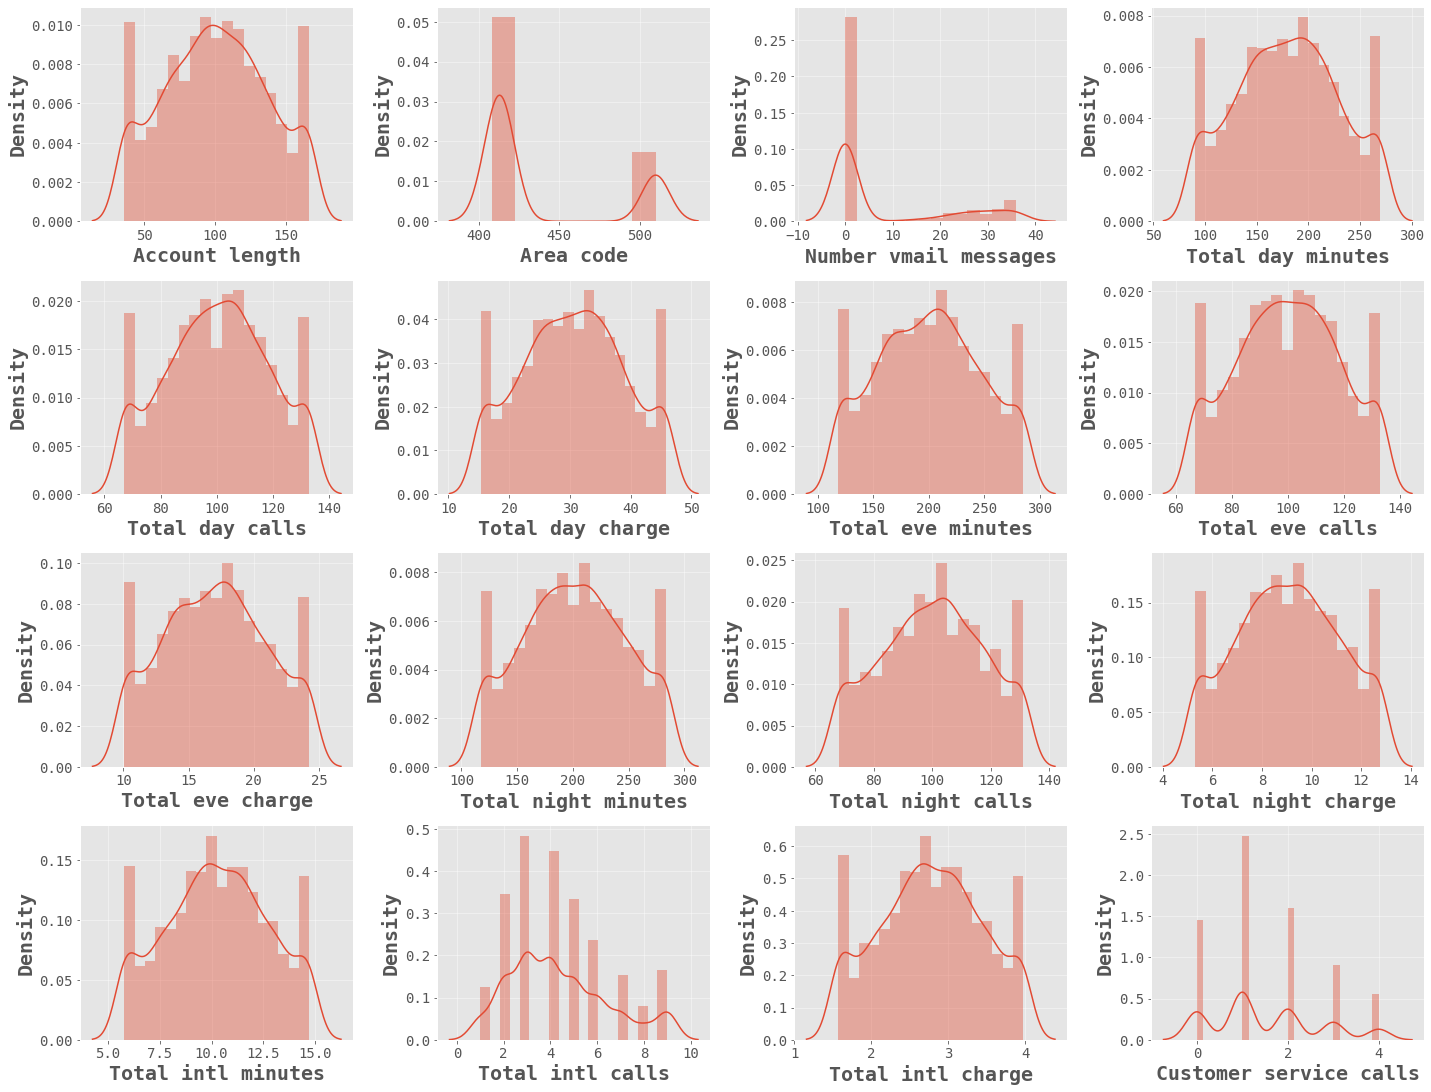

In [22]:
check_dist()

No handles with labels found to put in legend.


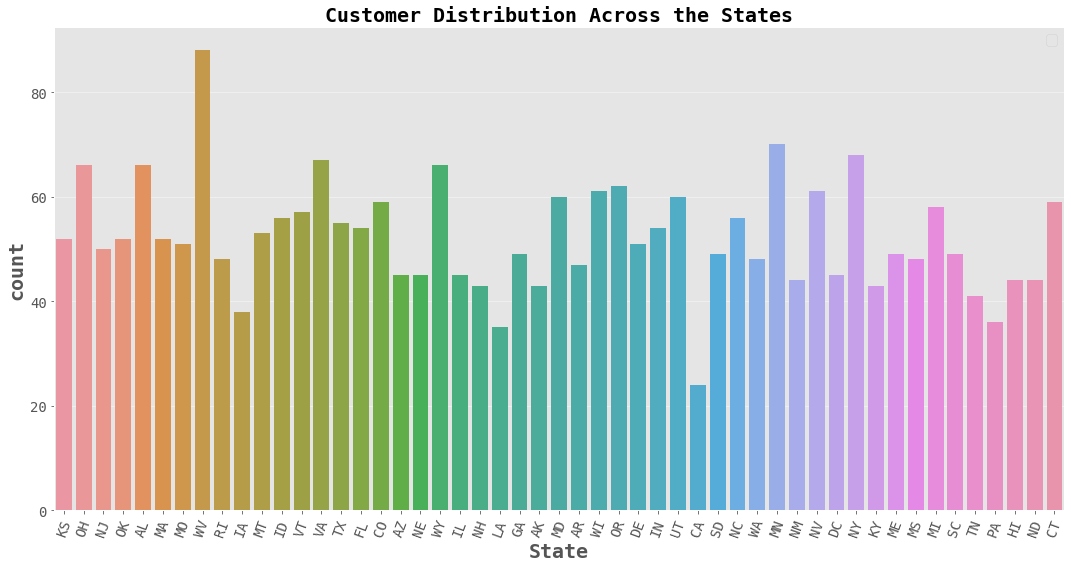

In [23]:
# Let's check the customer and churn distribution across the states
plt.figure(figsize = (15, 8))
sns.countplot(x = 'State', data = train_df)
plt.xticks(rotation = '70')
plt.title('Customer Distribution Across the States', fontsize = '20')
plt.legend()
plt.tight_layout()
plt.show()

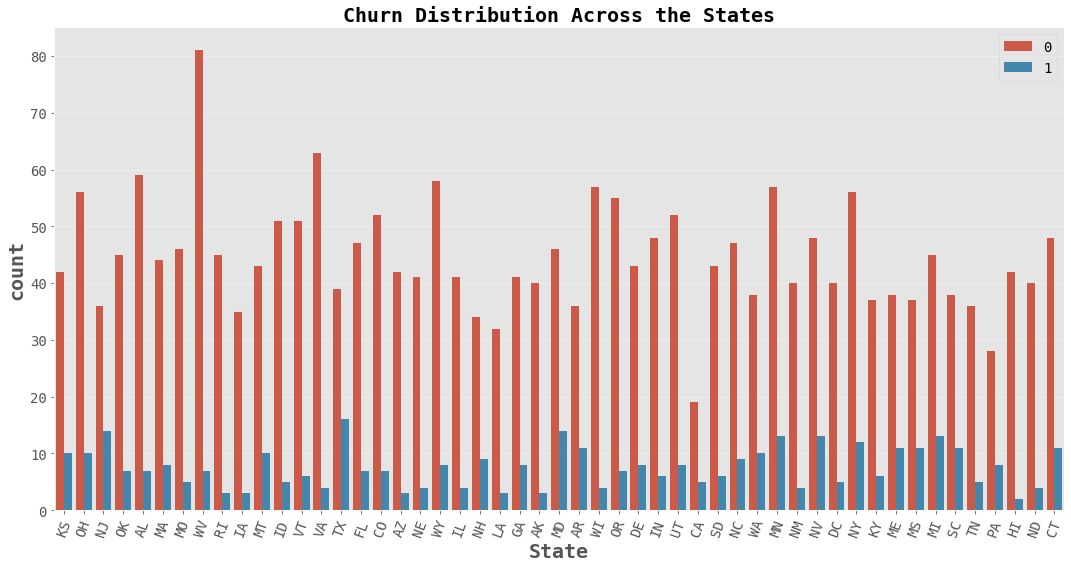

In [24]:
plt.figure(figsize = (15, 8))
sns.countplot(x = 'State', data = train_df, hue = 'Churn')
plt.xticks(rotation = '70')
plt.title('Churn Distribution Across the States', fontsize = '20')
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# Bivariate Analysis of the Variables
# Create function for Bivariate Analysis
def plot_bivariate(lvar1, lvar2):
    plt.figure(figsize = (15, 5))
    plt.subplot(1, 2, 1)
    plt.suptitle('Bivariate Analysis of Variables ' + lvar1 + ' And ' + lvar2, fontsize = 15)
    sns.boxplot(lvar1, lvar2, data = train_df)
    plt.subplot(1, 2, 2)
    sns.scatterplot(lvar1, lvar2, data = train_df)
    plt.tight_layout()
    plt.show()

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


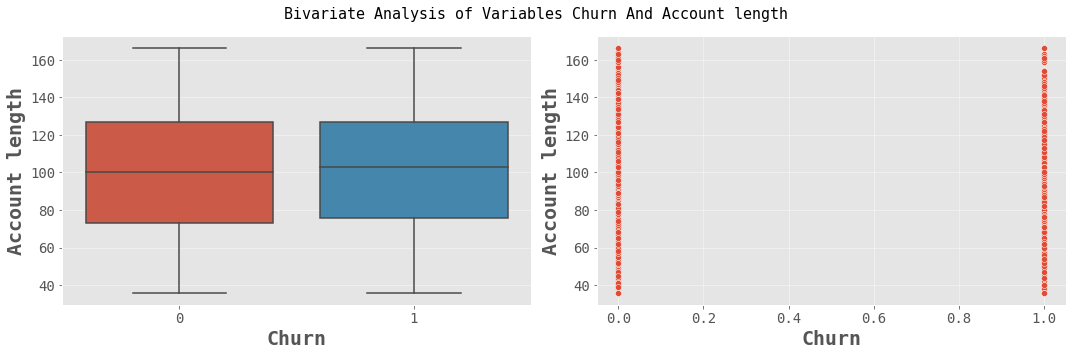

In [26]:
# Let's check the correlation of Account length with the target variable
plot_bivariate('Churn', 'Account length')

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


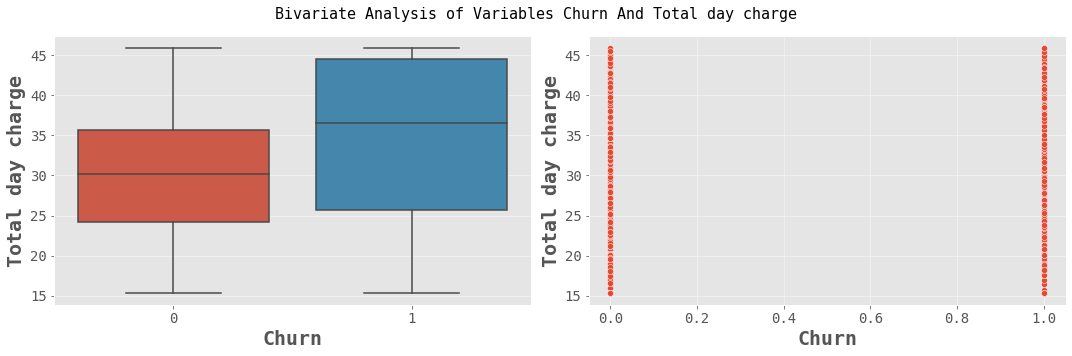

In [27]:
# Let's check the correlation of Total day charge with the target variable
plot_bivariate('Churn', 'Total day charge')

In [28]:
# 4. Feature Engineering
def perf_feature_engg(ldf):
    #Let's create two new feaures Total minutes, Total calls nd Total charge
    ldf['Total calls'] = ldf['Total day calls'] + ldf['Total eve calls'] + ldf['Total night calls'] + ldf['Total intl calls'] 
    ldf['Total minutes'] = ldf['Total day minutes'] + ldf['Total eve minutes'] + ldf['Total night minutes'] + ldf['Total intl minutes']
    ldf['Total charge'] = ldf['Total day charge'] + ldf['Total eve charge'] + ldf['Total night charge']+ ldf['Total intl charge']

In [29]:
perf_feature_engg(train_df)

In [30]:
train_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total minutes,Total charge
0,KS,128,415,0,1,25,265.100,110,45.070,197.400,...,91,11.01,10.0,3,2.70,1,0,303,717.2,75.5600
1,OH,107,415,0,1,26,161.600,123,27.470,195.500,...,103,11.45,13.7,3,3.70,1,0,332,625.2,59.2400
2,NJ,137,415,0,0,0,243.400,114,41.380,121.200,...,104,7.32,12.2,5,3.29,0,0,333,539.4,62.2900
3,OH,84,408,1,0,0,269.775,71,45.865,118.725,...,89,8.86,6.6,7,1.78,2,0,255,592.0,66.5975
4,OK,75,415,1,0,0,166.700,113,28.340,148.300,...,121,8.41,10.1,3,2.73,3,0,359,512.0,52.0900


In [31]:
#Statistical overview
train_df[['Total calls', 'Total minutes', 'Total charge']].describe()

,Total calls,Total minutes,Total charge
count,2666.000000,2666.000000,2666.000000
mean,304.771568,591.628882,59.420030
std,31.309697,81.975651,9.539126
min,206.000000,336.175000,33.237500
25%,283.000000,533.900000,52.452500
50%,305.000000,593.650000,59.320000
75%,326.000000,649.375000,66.487500
max,394.000000,831.300000,84.900000


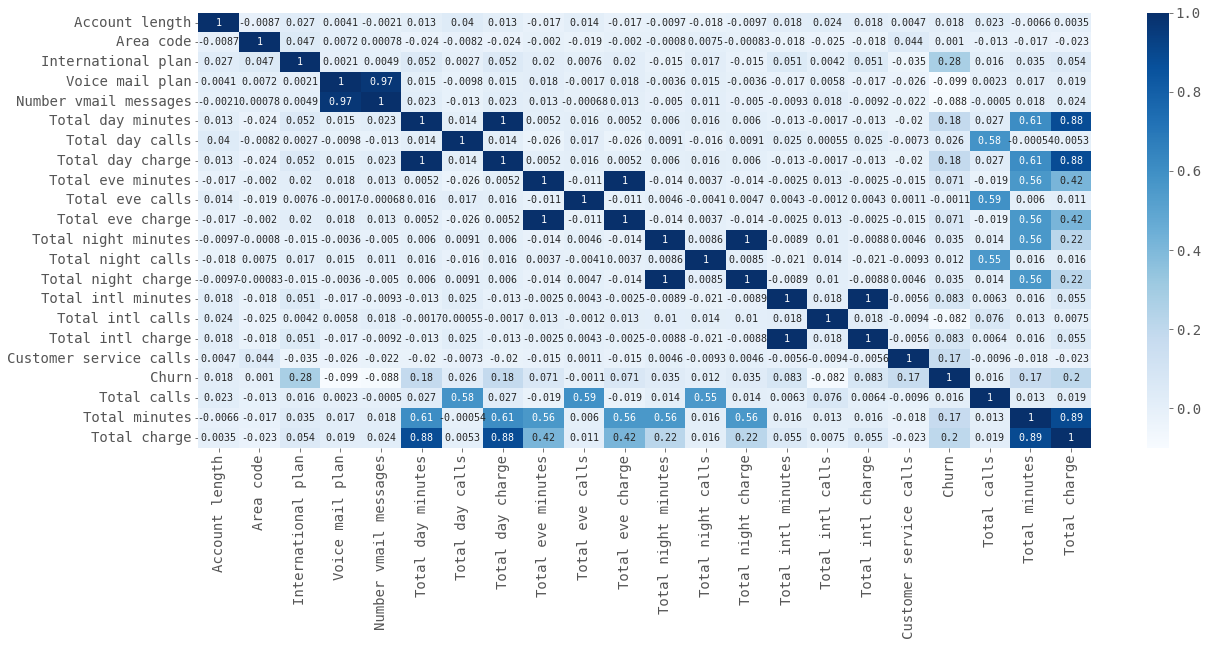

In [32]:
# Let's check for the highly correlated original variables that can be dropped
# Plot the heatmap to check the correlation
plt.figure(figsize = (20,8))
sns.heatmap(train_df.corr(), cmap = 'Blues', annot = True)
plt.show()

In [ ]:
# It can be seen that there is good correlation between the original variables and new features. Therefore, let's drop the following original variables:

# Total day calls
# Total day minutes
# Total day charge
# Total eve calls
# Total eve minutes
# Total eve charge
# Total night calls
# Total night charge
# Total night minutes
# There is also a very high correlation (0.89) between Total minutes and Total charge. One of the can be dropped.

In [33]:
def drop_corr_var(ldf):
        # Drop the original correlated variables
    var_to_drop = ['Total day calls', 'Total day minutes', 'Total day charge', \
                   'Total eve calls', 'Total eve minutes', 'Total eve charge' ,\
                  'Total night calls', 'Total night minutes', 'Total night charge'\
                  , 'State', 'Area code']
    ldf.drop(var_to_drop, axis = 1, inplace = True)

In [34]:
drop_corr_var(train_df)
train_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total minutes,Total charge
0,128,0,1,25,10.0,3,2.70,1,0,303,717.2,75.5600
1,107,0,1,26,13.7,3,3.70,1,0,332,625.2,59.2400
2,137,0,0,0,12.2,5,3.29,0,0,333,539.4,62.2900
3,84,1,0,0,6.6,7,1.78,2,0,255,592.0,66.5975
4,75,1,0,0,10.1,3,2.73,3,0,359,512.0,52.0900


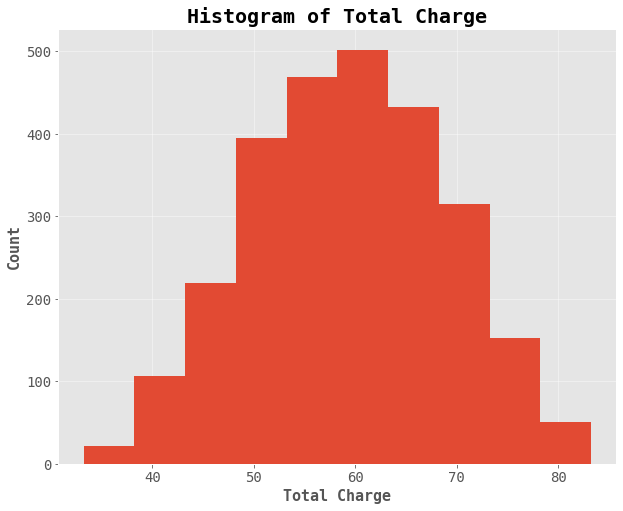

In [35]:
# Total Charge distribution
plt.figure(figsize = (10,8))
plt.hist(x = train_df['Total charge'], bins = np.arange(min(train_df['Total charge']), max(train_df['Total charge']), 5))
plt.title('Histogram of Total Charge', fontsize = 20)
plt.xlabel('Total Charge', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [36]:
# 5. Rescale/Normalize the features
# Get the variables to be normalized into a list
col_to_norm = ['Account length', 'Number vmail messages', 'Total intl calls', 'Total intl minutes', 'Total intl charge', 'Customer service calls', 'Total calls', 'Total minutes', 'Total charge']

In [38]:
# Intantiate the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# perforom the scaling on the required variables
train_df[col_to_norm] = scaler.fit_transform(train_df[col_to_norm])

In [39]:
train_df.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total minutes,Total charge
0,0.759024,0,1,1.308537,-0.107216,-0.641747,-0.108288,-0.437200,0,-0.056593,1.532097,1.692293
1,0.179793,0,1,1.384690,1.391443,-0.641747,1.392600,-0.437200,0,0.869812,0.409602,-0.018876
2,1.007265,0,0,-0.595283,0.783878,0.297790,0.777236,-1.282433,0,0.901757,-0.637246,0.300919
3,-0.454603,1,0,-0.595283,-1.484363,1.237328,-1.489105,0.408032,0,-1.589952,0.004528,0.752565
4,-0.702845,1,0,-0.595283,-0.066712,-0.641747,-0.063261,1.253265,0,1.732326,-0.971555,-0.768562


In [40]:
# Let's check the churn rate
print('Churn Rate is {}'.format(round(train_df.Churn.sum()/len(train_df.index)*100,2)))

Churn Rate is 14.55


In [41]:
#Let's find out the high value customers (Total Chare > 70 percentile)
pcet_70 = np.percentile(train_df['Total charge'], 70)
print('70th Percentile of charge amount {}'.format(pcet_70))

70th Percentile of charge amount 0.5669790499320201


In [42]:
# No of high value customers
high_value_cust = train_df.loc[train_df['Total charge'] >= pcet_70]

In [43]:
print('There are {} high value customers'.format(high_value_cust.shape[0]))

There are 800 high value customers


In [44]:
classes = round(train_df['Churn'].value_counts()/len(train_df.index)*100,2)
non_churn_share = classes[0]
churn_share = classes[1]

In [45]:
print('Non Churn Share : {}'.format(non_churn_share))
print('Churn Share : {}'.format(churn_share))

Non Churn Share : 85.45
Churn Share : 14.55


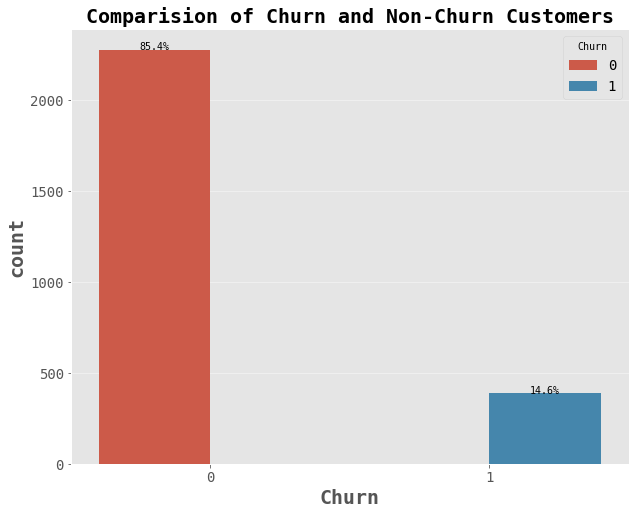

In [46]:
plt.figure(figsize = (10,8))
total = float(len(train_df))
ax = sns.countplot(x= 'Churn', data = train_df, hue = 'Churn')
plt.title('Comparision of Churn and Non-Churn Customers')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + (p.get_width()*0.5)
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

plt.show()

In [47]:
# It has been observed that the dataset is highly imbalanced with 85.4% Non-Churn cases and only 14.6% Churn cases. Any machine learning model would work quite well or with great satisfaction when there is equal distribution of each of the class labels. But, in this instance, no matter which model we build, the underlying algorithm will learn more about the non-churn cases rather than the churn ones.

# Therefore, to balance the class, we will use ADASYN sampling technique.


### 6. Balance the class (Churn)
Balance the class with ADASYN

In [50]:
#Assign the target variable to y_train
y_train = train_df.pop('Churn')
X_train = train_df

In [ ]:
#Drop the State and Area Code variables, as they do not seem to be adding any value to the modelling
#X_train.drop(['State', 'Area code'], axis = 1, inplace = True)

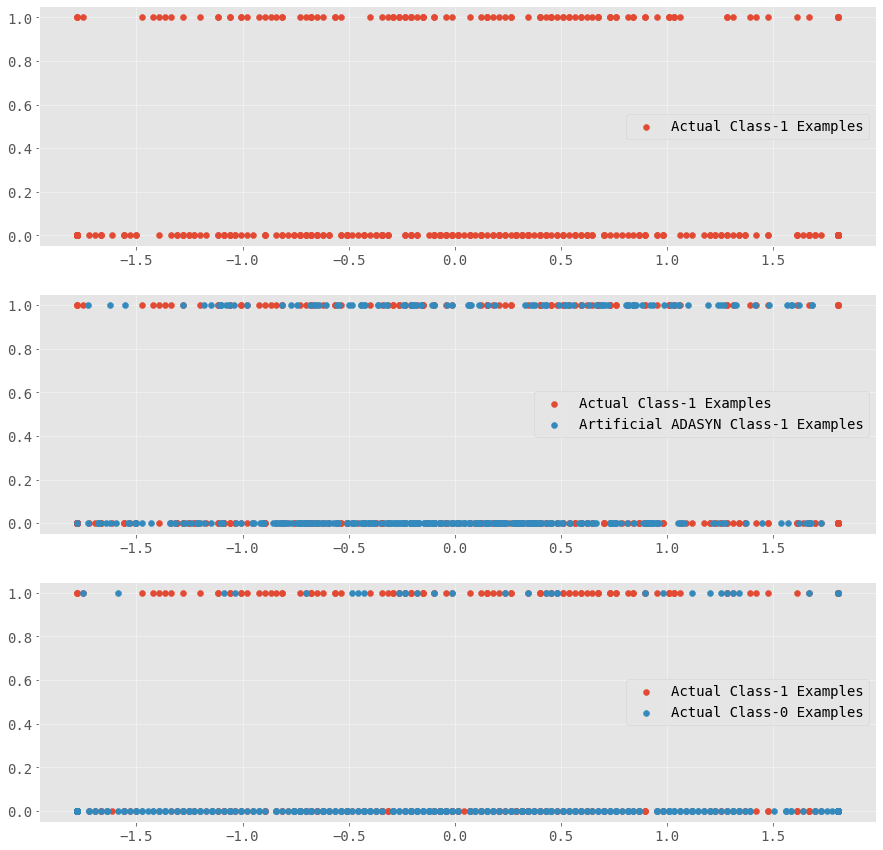

In [51]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

#X_train_1 = X_train[np.where(y_train==1)]
#X_train_0 = X_train[np.where(y_train==0)]


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [52]:
# Let's verify the changes
print('After Balancing X_train_adasyn : {}'.format(X_train_adasyn.shape[0]))
print('After Balancing y_train_adasyn : {}'.format(y_train_adasyn.shape[0]))

After Balancing X_train_adasyn : 4568
After Balancing y_train_adasyn : 4568


### 7. Model Training 

In [53]:
# XGBoost
# Tuning learning_rate
# hyperparameter tuning with XGBoost
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
             }          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=False)

In [54]:
# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [55]:
GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]},
             scoring='accuracy', verbose=1)

NameError: name 'nan' is not defined

In [56]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.954045,0.587605,0.011994,0.001672,0.1,{'learning_rate': 0.1},0.925602,0.977024,0.962801,0.968237,0.966046,0.959942,0.017806,6
1,0.415159,0.062582,0.007795,0.000400,0.2,{'learning_rate': 0.2},0.923414,0.980306,0.980306,0.976999,0.969332,0.966071,0.021703,1
2,0.312818,0.008217,0.007196,0.000748,0.3,{'learning_rate': 0.3},0.924508,0.980306,0.980306,0.973713,0.968237,0.965414,0.020946,3
3,0.302424,0.014227,0.006796,0.000400,0.4,{'learning_rate': 0.4},0.926696,0.975930,0.979212,0.975904,0.968237,0.965196,0.019585,5
4,0.288832,0.013364,0.006796,0.000400,0.5,{'learning_rate': 0.5},0.926696,0.980306,0.977024,0.972618,0.970427,0.965414,0.019661,2
5,0.280837,0.005326,0.006596,0.001019,0.6,{'learning_rate': 0.6},0.923414,0.982495,0.982495,0.969332,0.969332,0.965413,0.021809,4


In [ ]:
# a lot more is remaining https://www.kaggle.com/code/singhchandan1809/telecom-churn-prediction

End 